# 1장 - 도미와 빙어 분류하기

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [2]:
import matplotlib.pyplot as plt

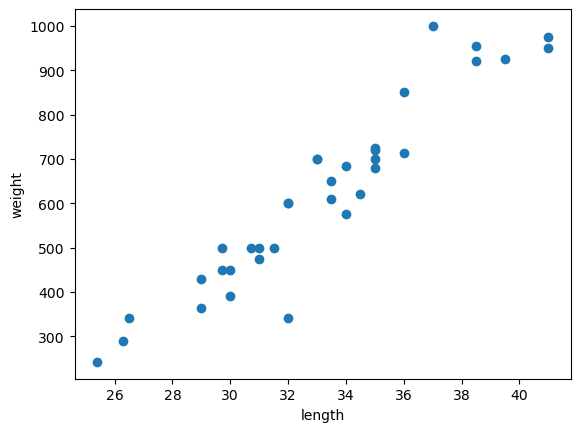

In [3]:
plt.scatter(bream_length, bream_weight)
plt.xlabel('length') # x축은 길이
plt.ylabel('weight') # y축은 무게
plt.show()

In [4]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

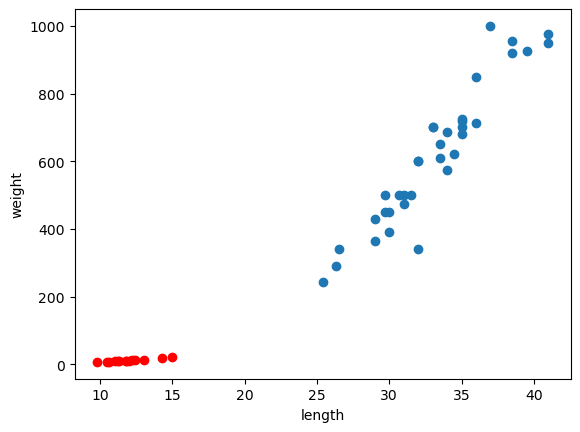

In [8]:
plt.scatter(bream_length, bream_weight) # 도미
plt.scatter(smelt_length, smelt_weight, color='red') # 빙어
plt.xlabel('length') # x축은 길이
plt.ylabel('weight') # y축은 무게
plt.show()

## k-최근접 이웃을 이용하여 도미와 빙어를 분류

In [9]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [10]:
fish_data = [[l, w] for l,w in zip(length, weight)] # length 와 weight 리스트를 2차원 리스트로 만들기, zip() : 나열된 리스트에서 원소를 하나씩 꺼내주는 역할 

In [12]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [13]:
fish_target = [1] * 35 + [0] * 14 # 도미 -> 1, 빙어 -> 0 으로 표현
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
from sklearn.neighbors import KNeighborsClassifier 

In [15]:
kn = KNeighborsClassifier() # 객체 생성

In [16]:
kn.fit(fish_data, fish_target)  # fit() -> 훈련

KNeighborsClassifier()

In [17]:
kn.score(fish_data, fish_target)  # score-> 훈련 평가, 0~1 사이의 값을 반환

1.0

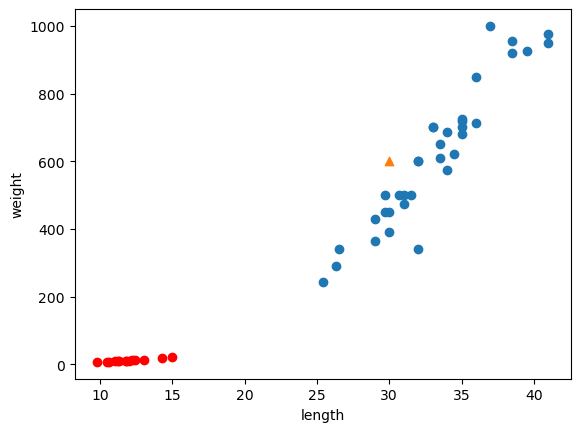

In [24]:
plt.scatter(bream_length, bream_weight) # 도미
plt.scatter(smelt_length, smelt_weight, color='red') # 빙어
plt.scatter(30, 600, marker='^')
plt.xlabel('length') # x축은 길이
plt.ylabel('weight') # y축은 무게
plt.show()

In [18]:
kn.predict([[30, 600]])  # predict() : 새로운 데이터의 정답을 예측, 1 -> 도미, 0 -> 빙어

array([1])

In [19]:
print(kn._fit_X)  # fish_data

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [20]:
print(kn._y)  # fish_target

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
kn49 = KNeighborsClassifier(n_neighbors=49) # n_neighbors = 참고 데이터를 49개로 한 kn49, default 값은 5이다.

In [22]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [23]:
print(35/49) # 정확도 = (정확히 맞힌 개수) / (전체 데이터 개수)

0.7142857142857143


### score 가 1로 내려가기 시작하는 이웃의 개수를 찾아보세요

In [25]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [29]:
for n in range(5, 50):
    # k-최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939


# 팀 회의
## Q. score가 1인 최근접 이웃 개수 중에서(5~17) 좋은예측을 위해 최근접 이웃 개수를 어떻게 설정하면 좋을까?
## Answer. 어떤 데이터이냐에 따라 상황에 맞게 유동적으로 설정해야 함! (변수의 개수, 데이터 특성 등)

# 2-1 테스트 데이터와 훈련 데이터

In [30]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [31]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)] # 샘플
fish_target = [1]*35 + [0]*14

In [32]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

### index(인덱스) 지정

In [33]:
print(fish_data[4]) # fish_data의 다섯 번째 샘플 출력

[29.0, 430.0]


### slicing(슬라이싱)

In [34]:
print(fish_data[0:5])  # 첫 번째부터 다섯 번째까지의 샘플 선택
# print(fish_data[:5])  # 첫 번째부터 다섯 번째까지의 샘플 선택
# print(fish_data[44:])  # 마지막 5개의 샘플 출력

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


### 훈련 데이터, 테스트 데이터 나누기

In [35]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]
# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]
# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]
# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [36]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)  # 샘플링 편향 - 훈련 데이터를 섞어야 함

0.0

### 샘플을 랜덤하게 섞기

In [37]:
import numpy as np

In [38]:
input_arr = np.array(fish_data)  # array() : 파이썬 리스트를 넘파이 배열로 바꾸기
target_arr = np.array(fish_target)

In [39]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [40]:
print(input_arr.shape) # (샘플 수, 특성 수)를 출력

(49, 2)


### 데이터 섞기(인덱스를 섞은 후 input_arr와 target_arry 샘플 선택)

In [43]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [44]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


### 배열 인덱싱(array indexing)

In [46]:
print(input_arr[[1,3]]) # 두 번째와 네 번째 샘플 선택

[[ 26.3 290. ]
 [ 29.  363. ]]


### index 배열을 input_arr 와 target_arr 에 전달

In [47]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [48]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [52]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]
test_input

array([[ 10.6,   7. ],
       [  9.8,   6.7],
       [ 35. , 680. ],
       [ 11.2,   9.8],
       [ 31. , 475. ],
       [ 34.5, 620. ],
       [ 33.5, 610. ],
       [ 15. ,  19.9],
       [ 34. , 575. ],
       [ 30. , 390. ],
       [ 11.8,   9.9],
       [ 32. , 600. ],
       [ 36. , 850. ],
       [ 11. ,   9.7]])

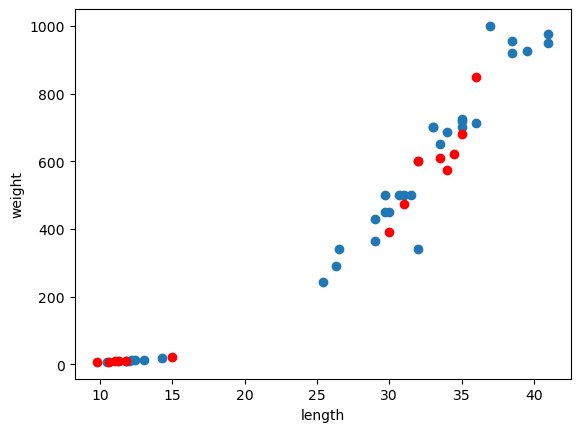

In [51]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])  # 훈련 세트
plt.scatter(test_input[:,0], test_input[:,1], color='red')  # 테스트 세트
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [53]:
kn = kn.fit(train_input, train_target)

In [54]:
kn.score(test_input, test_target)

1.0

In [55]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [56]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# 2-2 데이터 전처리

In [57]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [58]:
import numpy as np

In [59]:
np.column_stack(([1,2,3], [4,5,6]))  # column_stack() : 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결

array([[1, 4],
       [2, 5],
       [3, 6]])

### numpy 를 이용하여 2차원 배열의 데이터 생성 

In [60]:
fish_data = np.column_stack((fish_length, fish_weight))

In [61]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [62]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


### numpy 를 이용하여 target 데이터 생성

In [63]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [64]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
train_input, test_input, train_target, test_target = train_test_split(
fish_data, fish_target, random_state=42)  # random_state : 랜덤 시드 지정

In [67]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [68]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [69]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### 샘플링 편향 해결

In [70]:
train_input, test_input, train_target, test_target = train_test_split(
fish_data, fish_target, stratify=fish_target, random_state=42)  
# stratify : 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔

In [71]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [72]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

### 도미 데이터 예측

In [73]:
print(kn.predict([[25, 150]]))  # 빙어로 예측

[0.]


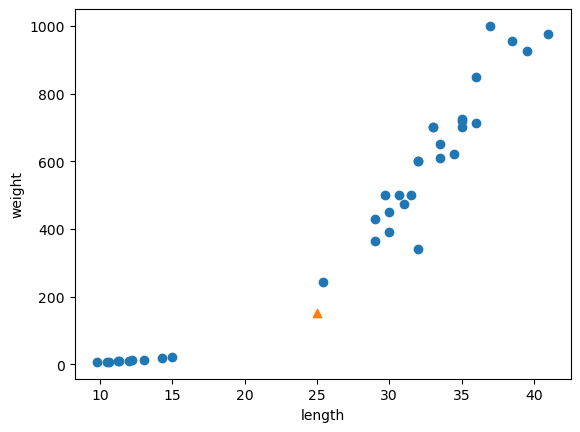

In [74]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [93]:
distances, indexes = kn.kneighbors([[25, 150]])  # kn.neighbors() : 이웃까지의 거리와 이웃 샘플의 인덱스를 반환
indexes

array([[10, 35, 17,  4,  7]], dtype=int64)

# 팀 회의
## Q. kn.neighbors()가 어떤 값을 반환하는지?
## Answer. 새로운 데이터와 가장 가까운 이웃 데이터의 거리와 인덱스를 반환해준다. 반환하는 이웃 수는 kn = KNeighborsClassifier() 객체에서 설정하는 n_neighbors의 값에 따라 이웃 수가 변한다. 

### indexes 배열을 사용해 훈련 데이터의 이웃 샘플을 구분하여 산점도 그리기

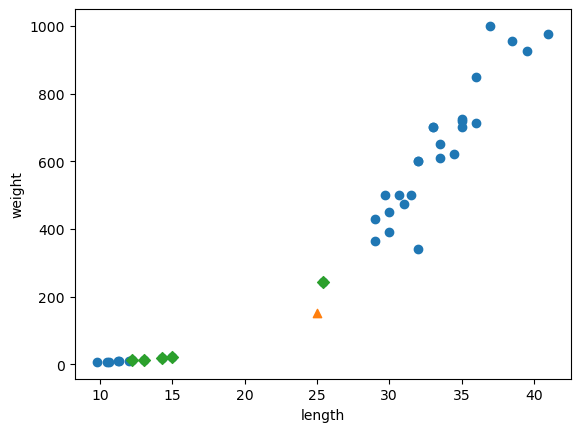

In [76]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') # marker='D' : 마름모
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [77]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [78]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [79]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### x축 범위와, y축 범위를 동일하게 맞추어 산점도 그래프를 다시 그려보자

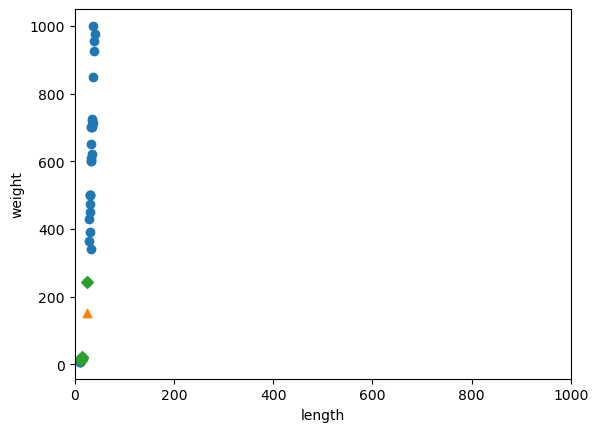

In [80]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 산점도가 일직선으로 나타남 -> 생선의 길이가 거리에 영향을 미치지 못함

## 두 특성의 스케일이 다르기 때문에 표준점수(standard score)를 이용

### 표준점수 : 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타내는 지표

In [81]:
mean = np.mean(train_input, axis=0)  # 평균
std = np.std(train_input, axis=0)  # 표준편차
# axis=0 : 행을 따라 각 열의 통계 값을 계산

In [82]:
print(mean, std) # 각 특성의 평균과 표준편차

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


## 브로드캐스팅(broadcasting)
### train_input의 모든 행에서 mean에 있는 평균값을 뺀 후 표준편차를 모든 행에 나눠준다.

In [84]:
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

### 전처리 데이터로 모델 훈련하기

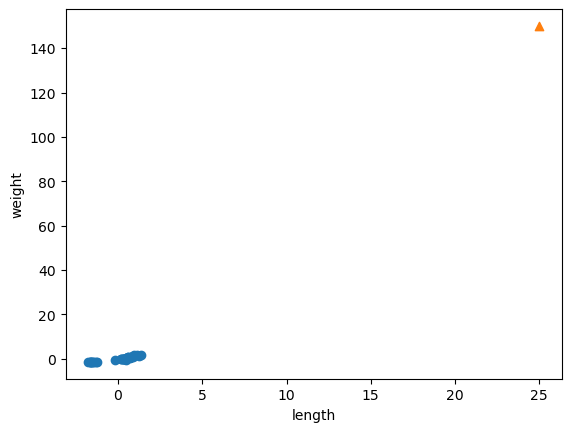

In [85]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

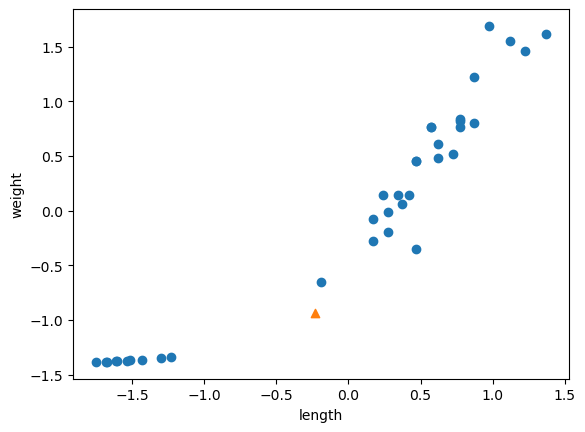

In [86]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [87]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

### 테스트 세트의 스케일 변환 

In [88]:
test_scaled = (test_input - mean) / std

In [89]:
kn.score(test_scaled, test_target)

1.0

In [90]:
print(kn.predict([new]))  # 도미로 예측!

[1.]


### k-최근접 이웃을 구한 다음 산점도 그리기

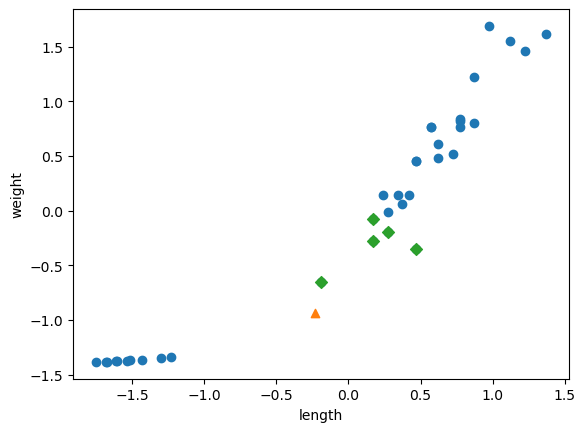

In [92]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()